# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

**For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital.** Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('./insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ *Questions for DC: What do they mean by appropriateness?*

Mean = 13270.42
Standard Deviation = 12105.48


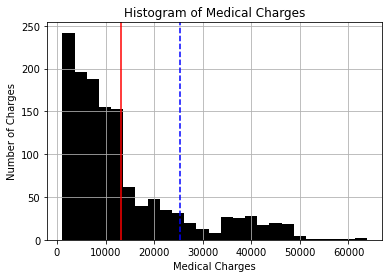

In [4]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges'])

medical['charges'].hist(bins=25, color='black')
_ = plt.xlabel('Medical Charges')
_ = plt.ylabel("Number of Charges")
_ = plt.title("Histogram of Medical Charges")
plt.axvline(mean, color='red', linestyle="-")
plt.axvline(mean+std, color='blue', linestyle="--")

print(f"Mean = {mean:.2f}\nStandard Deviation = {std:.2f}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The mean and standard deviation of the sample aren't appropriate because the distribution is highly skewed. If this data represents a random sample of charges we can justify the claim by bootstrapping on the data and create a sampling distribution. Then determine where the mean value of 13,270 falls on the distribution

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We are testing whether the actual average charge has fallen below 12k. There are no consqeuences for missing an effect in the more than 12k direction if we were to use a one-sided interval. 

In [76]:
from scipy.stats import norm

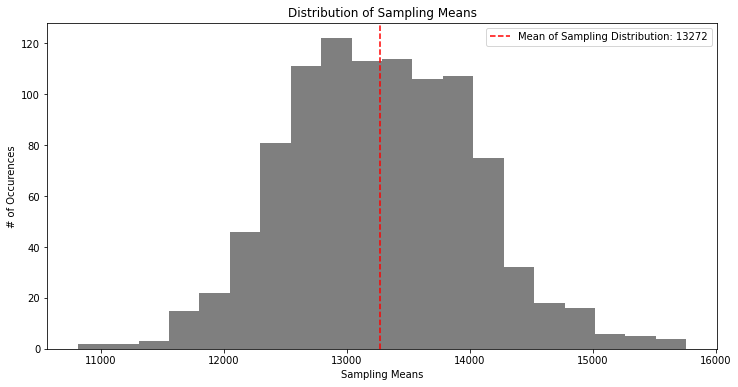

In [87]:
# We can't do comparisons unless our distribution is normal
# So we'll create a sampling distribution of means from samples of the medical df

charges_samples_mean = np.empty(1000)

for i in range(len(charges_samples_mean)):
    charges_samples_mean[i] =  medical.sample(n=267, replace=True)['charges'].mean() # A fifth of the samples

mean_sample = np.mean(charges_samples_mean)
std_sample = np.std(charges_samples_mean)

plt.figure(figsize=(12,6))
ax = plt.hist(charges_samples_mean, bins=20, alpha=0.5, color='black')
_ = plt.xlabel("Sampling Means")
_ = plt.ylabel("# of Occurences")
_ = plt.title("Distribution of Sampling Means")

_ = plt.axvline(mean_sample, color='red', linestyle='--', label=f'Mean of Sampling Distribution: {round(mean_sample)}')
_ = plt.legend(loc=0)

In [88]:
cv_z = 1.645
MoEz = round(cv_z * std_sample,2)
MoEz

1248.8

In [89]:
CI_z = (mean_sample - MoEz)
CI_z

12022.713434082136

In [90]:
norm.ppf(0.05,loc=mean_sample, scale=std_sample)

12022.825499790735

**The value 12022 is the one-sided 95% interval on the "negative side". This means that from our sampling distribution, 95% of the charges (which were means from bootstraped samples of our data) are above this value. With that being said, the administrator does not have to worry about charges being below the 12k mark** 

*Note: I didn't use a random state so the 12022 should change every run and changes depending on how many samples you choose in the bootstrap*

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance are charges the same as people without insurance. *Are we making the assumption that the population variance is the same*

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [18]:
# First we need to split the data into insurance and no insurance
medical_ins = medical[medical['insuranceclaim'] == 1]['charges']
medical_no_ins = medical[medical['insuranceclaim'] == 0]['charges']

In [31]:
n0 = len(medical_ins)
n1 = len(medical_no_ins)

s0 = np.std(medical_ins)
s1 = np.std(medical_no_ins)

x0_bar = np.mean(medical_ins)
x1_bar = np.mean(medical_no_ins)

In [36]:
sp_numerator = (n0-1)*s0**2 + (n1-1)*s1**2 
sp_denominator = n0+n1-2
sp = np.sqrt(sp_numerator / sp_denominator)

In [38]:
t_numerator = x0_bar - x1_bar
t_denominator = sp * np.sqrt(1/n0 + 1/n1)
t = t_numerator / t_denominator
t

11.901306943555388

In [39]:
scipy.stats.ttest_ind_from_stats(x0_bar, s0, n0, x1_bar, s1, n1)

Ttest_indResult(statistic=11.901306943555388, pvalue=4.090550214373679e-31)

In [40]:
# Instead of calculating, can't we just pass in the samples as is and use ttest_ind
scipy.stats.ttest_ind(medical_ins, medical_no_ins)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

We reject the null that people with and without insurance get charged the same amount

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There isn't one

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test